# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [ ]:
# student 1: Dov 5434
# student 2: Idan 0755
# student 3: guy 0941

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [1]:
# Import necessary libraries
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Scikit-learn imports
from sklearn import datasets, preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

# IPython configuration to display multiple outputs in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Ignore warnings
warnings.simplefilter("ignore")

# Enable inline plotting
%matplotlib inline

In [2]:

df1 = pd.read_csv('housing_train.csv') 
df2 = pd.read_csv('housing_test.csv') 



In [3]:
df1.head()
df2.head()
df1.describe()
df2.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,4.0179,46.0,4.158690,1.032746,512.0,1.289673,34.07,-118.35,3.500
1,2.7002,6.0,4.149245,1.179989,4092.0,2.287311,34.05,-117.31,0.883
2,1.2762,17.0,3.432331,1.022556,1325.0,2.490602,34.42,-119.69,2.536
3,4.9342,23.0,5.735798,1.053201,4580.0,4.129847,34.04,-117.93,1.810
4,2.2755,21.0,4.064607,0.962079,2109.0,2.962079,32.58,-117.11,1.250


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,5.3254,32.0,5.786260,1.033079,982.0,2.498728,34.29,-119.27,3.852
1,5.3032,52.0,5.095745,1.028369,980.0,3.475177,34.08,-118.12,2.457
2,4.1679,41.0,6.617486,1.371585,915.0,2.500000,37.05,-122.05,2.013
3,3.6429,28.0,5.249180,1.009836,848.0,2.780328,38.69,-121.41,1.052
4,2.7457,17.0,11.183267,2.107570,675.0,2.689243,38.88,-119.99,1.078


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,3.863517,28.650678,5.412479,1.093546,1424.287609,3.101201,35.631452,-119.566283,2.065267
std,1.878577,12.623994,2.088680,0.378594,1139.012630,11.587773,2.137537,2.006552,1.151219
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.564375,18.000000,4.448665,1.005988,789.000000,2.431070,33.930000,-121.800000,1.192000
50%,3.536650,29.000000,5.225511,1.048780,1167.000000,2.816355,34.250000,-118.490000,1.796000
75%,4.744375,37.000000,6.046629,1.099691,1722.000000,3.281612,37.710000,-118.000000,2.647000
max,15.000100,52.000000,62.422222,15.312500,35682.000000,1243.333333,41.950000,-114.310000,5.000010


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000
mean,3.899288,28.594719,5.495082,1.109192,1430.233285,2.948471,35.633498,-119.583391,2.081721
std,1.982501,12.432039,3.626932,0.741310,1105.994960,1.494160,2.129860,1.991586,1.164887
min,0.499900,2.000000,1.260870,0.526316,9.000000,1.060606,32.550000,-124.300000,0.149990
25%,2.562500,18.000000,4.408809,1.006401,782.000000,2.428303,33.930000,-121.790000,1.213000
50%,3.528300,29.000000,5.242364,1.048403,1159.000000,2.830808,34.270000,-118.540000,1.801000
75%,4.738725,37.000000,6.072817,1.098704,1740.250000,3.283055,37.712500,-118.020000,2.649250
max,15.000100,52.000000,141.909091,34.066667,16305.000000,83.171429,41.820000,-114.470000,5.000010


             MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc         1.00     -0.12      0.38      -0.08        0.00      0.02   
HouseAge      -0.12      1.00     -0.18      -0.10       -0.30      0.02   
AveRooms       0.38     -0.18      1.00       0.79       -0.08     -0.01   
AveBedrms     -0.08     -0.10      0.79       1.00       -0.07     -0.01   
Population     0.00     -0.30     -0.08      -0.07        1.00      0.07   
AveOccup       0.02      0.02     -0.01      -0.01        0.07      1.00   
Latitude      -0.09      0.01      0.11       0.07       -0.10      0.01   
Longitude     -0.01     -0.11     -0.03       0.02        0.09     -0.00   
MedHouseVal    0.69      0.11      0.17      -0.07       -0.03     -0.02   

             Latitude  Longitude  MedHouseVal  
MedInc          -0.09      -0.01         0.69  
HouseAge         0.01      -0.11         0.11  
AveRooms         0.11      -0.03         0.17  
AveBedrms        0.07       0.02        -0.07  

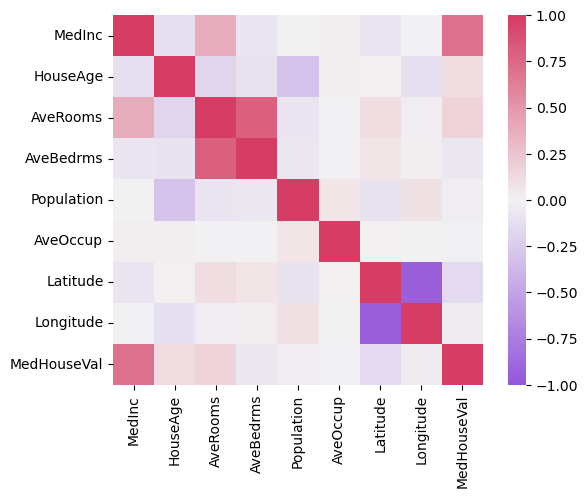

In [4]:
Corr_Matrix = round(df1.corr(),2)

print(Corr_Matrix)

correlation_house = Corr_Matrix

axis_corr = sns.heatmap(
correlation_house,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(1000, 2, n=500),
square=True
)

plt.show()



             MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc         1.00     -0.13      0.23      -0.04        0.02     -0.02   
HouseAge      -0.13      1.00     -0.11      -0.05       -0.29     -0.01   
AveRooms       0.23     -0.11      1.00       0.92       -0.07     -0.02   
AveBedrms     -0.04     -0.05      0.92       1.00       -0.07     -0.03   
Population     0.02     -0.29     -0.07      -0.07        1.00      0.19   
AveOccup      -0.02     -0.01     -0.02      -0.03        0.19      1.00   
Latitude      -0.06      0.01      0.11       0.08       -0.13     -0.11   
Longitude     -0.04     -0.11     -0.03      -0.00        0.12      0.11   
MedHouseVal    0.70      0.09      0.13      -0.02       -0.02     -0.13   

             Latitude  Longitude  MedHouseVal  
MedInc          -0.06      -0.04         0.70  
HouseAge         0.01      -0.11         0.09  
AveRooms         0.11      -0.03         0.13  
AveBedrms        0.08      -0.00        -0.02  

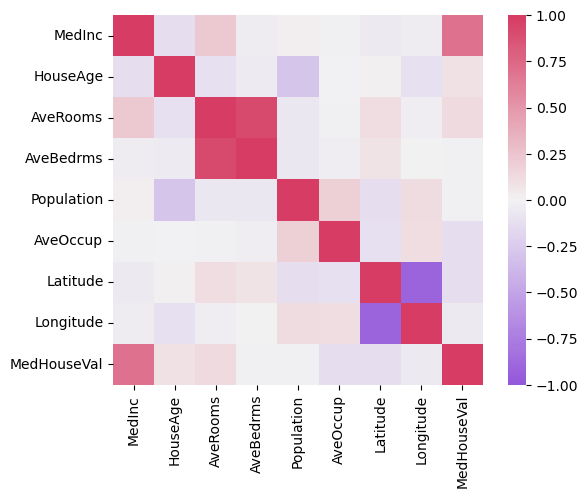

In [5]:
Corr_Matrix2 = round(df2.corr(),2)

print(Corr_Matrix2)

correlation_house = Corr_Matrix2

axis_corr = sns.heatmap(
correlation_house,
vmin=-1, vmax=1, center=0,
cmap=sns.diverging_palette(1000, 2, n=500),
square=True
)

plt.show()




In [6]:
def plot_feature_vector(fv1, fv2):#creates two plots from input columns
    plt.figure(figsize=(5, 3))
    plt.scatter(fv1, fv2, color='blue', label='Data Points')

    # Use the name of the Series or a brief description as labels instead of the entire Series
    xlabel = fv1.name if fv1.name else 'Feature 1'
    ylabel = fv2.name if fv2.name else 'Feature 2'

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f'{xlabel} & {ylabel}')
    plt.legend()
    plt.grid(True)
    plt.show()

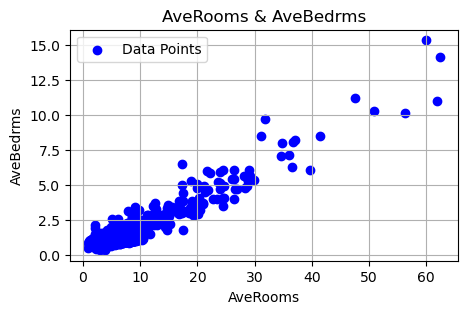

In [7]:
plot_feature_vector(df1["AveRooms"] , df1["AveBedrms"])

## Part 3 - Experiments
You could add as many code cells as needed

In [8]:
# List to store results for each scaler
results = []

train_X = df1.drop('MedHouseVal', axis=1)  # Training features
train_y = df1['MedHouseVal']               # Training target

test_X = df2.drop('MedHouseVal', axis=1)    # Testing features
test_y = df2['MedHouseVal']                 # Testing target


# Initialize a Random Forest Regressor model
rf_model = RandomForestRegressor()

# Define the hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [50],
    'max_depth': [ 10],
    'min_samples_split': [10],
    'min_samples_leaf': [1]
}

# Initialize a dictionary to hold the best scaler and its corresponding model
best_scaler = None
best_model = None
best_score = -np.inf

# Define scalers to test
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler()
}

# Iterate over scalers
for scaler_name, scaler in scalers.items():
    print(f'Processing scaler: {scaler_name}')
    
    # Scale the data
    train_X_scaled = scaler.fit_transform(train_X)
    test_X_scaled = scaler.transform(test_X)
    
    # Initialize Grid Search with 5-fold cross-validation
    grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='r2')
    
    # Fit Grid Search to the scaled training data
    grid_search.fit(train_X_scaled, train_y)
    
    # Get the best parameters and model
    best_params = grid_search.best_params_
    best_model_temp = grid_search.best_estimator_
    
    # Make predictions on the test set
    test_y_pred = best_model_temp.predict(test_X_scaled)
    
    # Calculate R² score for the test set
    test_r2 = r2_score(test_y, test_y_pred)
    
    # Make predictions on the training set
    train_y_pred = best_model_temp.predict(train_X_scaled)
    
    # Calculate R² score for the training set
    train_r2 = r2_score(train_y, train_y_pred)
    
    print(f'{scaler_name} - Best Random Forest Parameters: {best_params}')
    print(f'{scaler_name} - Random Forest R² Score on test data: {test_r2}')
    print(f'{scaler_name} - Random Forest R² Score on training data: {train_r2}')

    # Add results to the list
    results.append({
        'Scaler': scaler_name,
        'Train R²': train_r2,
        'Test R²': test_r2,
        'Best Params': best_params
    })
    
    # Update the best scaler and model if this is the best score so far
    if test_r2 > best_score:
        best_score = test_r2
        best_scaler = scaler
        best_model = best_model_temp
        best_params_final = best_params  # Store the best params for the best scaler

print(f'Best Scaler: {type(best_scaler).__name__}')
print(f'Best Random Forest Parameters: {best_params_final}')

# Scale the data with the best scaler
train_X_best_scaled = best_scaler.fit_transform(train_X)
test_X_best_scaled = best_scaler.transform(test_X)

# Evaluate the best model on the scaled data
train_y_pred = best_model.predict(train_X_best_scaled)
test_y_pred = best_model.predict(test_X_best_scaled)

# Calculate R² scores
train_r2 = r2_score(train_y, train_y_pred)
test_r2 = r2_score(test_y, test_y_pred)

print(f'Final Random Forest R² Score on training data (best scaler): {train_r2}')
print(f'Final Random Forest R² Score on test data (best scaler): {test_r2}')

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results)

# Display the DataFrame as CSV-like output (without actually saving to a file)
csv_output = results_df.to_csv(index=False)
print(csv_output)

Processing scaler: StandardScaler


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10], 'min_samples_leaf': [1],
                         'min_samples_split': [10], 'n_estimators': [50]},
             scoring='r2')

StandardScaler - Best Random Forest Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
StandardScaler - Random Forest R² Score on test data: 0.7991551682342088
StandardScaler - Random Forest R² Score on training data: 0.859916693600735
Processing scaler: MinMaxScaler


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10], 'min_samples_leaf': [1],
                         'min_samples_split': [10], 'n_estimators': [50]},
             scoring='r2')

MinMaxScaler - Best Random Forest Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
MinMaxScaler - Random Forest R² Score on test data: 0.7973832082843738
MinMaxScaler - Random Forest R² Score on training data: 0.8589627146981036
Processing scaler: RobustScaler


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10], 'min_samples_leaf': [1],
                         'min_samples_split': [10], 'n_estimators': [50]},
             scoring='r2')

RobustScaler - Best Random Forest Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
RobustScaler - Random Forest R² Score on test data: 0.796962385596274
RobustScaler - Random Forest R² Score on training data: 0.8597921089484537
Best Scaler: StandardScaler
Best Random Forest Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Final Random Forest R² Score on training data (best scaler): 0.859916693600735
Final Random Forest R² Score on test data (best scaler): 0.7991551682342088
Scaler,Train R²,Test R²,Best Params
StandardScaler,0.859916693600735,0.7991551682342088,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}"
MinMaxScaler,0.8589627146981036,0.7973832082843738,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}"
RobustScaler,0.8597921089484537,0.796962385596274,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_spl

## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [9]:
# Best parameters and scaler are already found using cross-validation
print(f'Retraining the model on the entire training set using the best scaler and parameters...')

# Scale the entire training data using the best scaler
train_X_best_scaled = best_scaler.fit_transform(train_X)

# Initialize the Random Forest Regressor with the best parameters
best_model_final = RandomForestRegressor(**best_params_final)

# Train the final model on the entire scaled training data
best_model_final.fit(train_X_best_scaled, train_y)

# Evaluate the final model on the training data
train_y_pred_final = best_model_final.predict(train_X_best_scaled)

# Calculate the final R² score on the training data
train_r2_final = r2_score(train_y, train_y_pred_final)
print(f'Final Random Forest R² Score on the entire training data: {train_r2_final}')

# Optionally: Evaluate on the test set to see the final performance on unseen data
test_X_best_scaled = best_scaler.transform(test_X)
test_y_pred_final = best_model_final.predict(test_X_best_scaled)
test_r2_final = r2_score(test_y, test_y_pred_final)
print(f'Final Random Forest R² Score on the test data: {test_r2_final}')


Retraining the model on the entire training set using the best scaler and parameters...


RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=50)

Final Random Forest R² Score on the entire training data: 0.8593398282906295
Final Random Forest R² Score on the test data: 0.7975896886174627


## Part 5 - Apply on test and show model performance estimation

In [10]:
#Display the prediction results of the first 5 examples

test_results = pd.DataFrame({
    'Actual': test_y,
    'Predicted': test_y_pred_final
})
print("First 5 predictions on the test set:")
print(test_results.head())

# Calculation of the R² score on the test set
test_r2_final = r2_score(test_y, test_y_pred_final)
print(f'Final Random Forest R² Score on the test data: {test_r2_final}')

First 5 predictions on the test set:
   Actual  Predicted
0   3.852   3.359727
1   2.457   2.564003
2   2.013   2.433143
3   1.052   1.273703
4   1.078   1.216493
Final Random Forest R² Score on the test data: 0.7975896886174627
